# Simple Linear Regression

### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

### Importing the Whole dataset

In [2]:
df = pd.read_csv('kc_house_data.csv')

### Displaying the dataset

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### Importing Only the Required Columns of Dataset

In [4]:
df = pd.read_csv('kc_house_data.csv', usecols = ['sqft_living', 'price'], sep = ',')
df.head()

,price,sqft_living
0,221900.0,1180
1,538000.0,2570
2,180000.0,770
3,604000.0,1960
4,510000.0,1680


In [5]:
print(df.shape)
X = df.iloc[:, 1:2].values
y = df.iloc[:, 0:1].values

(21613, 2)


### Splitting the dataset into the Training set and Test set

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

### Visualising the Training set results

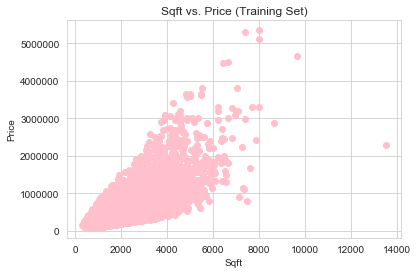

In [7]:
plt.scatter(X_train, y_train, color = 'pink')
plt.title('Sqft vs. Price (Training Set)')
plt.xlabel('Sqft')
plt.ylabel('Price')
plt.show()

### Visualising the Test set results

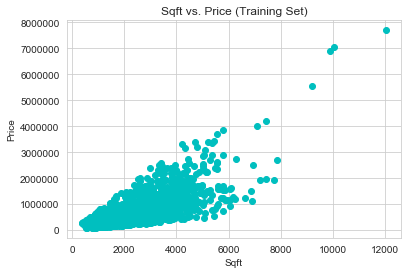

In [8]:
plt.scatter(X_test, y_test, color = 'c')
plt.title('Sqft vs. Price (Training Set)')
plt.xlabel('Sqft')
plt.ylabel('Price')
plt.show()

### Training the Simple Linear Regression model on the Training set & getting the final linear equation with the values of coefficients

In [9]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)
print(regressor.coef_, regressor.intercept_)

[[273.93268184]] [-29206.97343444]


From the Simple Linear Regression formula (y = b0 + b1(x)),
Here, -b0 = -29206 and b1 = 273.93.
So, b1 tells us that the price of any house increases by 273.93 units in price, per unit increase in Sqft.

### Now let's predict some prices in the test set and look at the errors associated. Error in regression would generally mean Regression Sum of Squares RSS, where, RSS = SUM[(predictions - RealValue)^2]

In [14]:
prediction = regressor.predict(X_test)
Errors = prediction - y_test
RSS = np.sum(np.square(Errors))
print(RSS)

516543861194877.56


### Plotting the Predicted Values

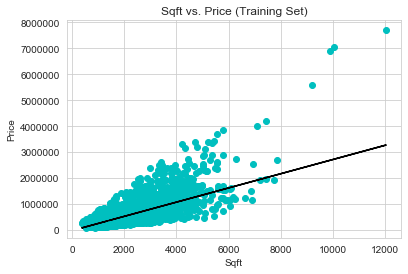

In [11]:
plt.scatter(X_test, y_test, color = 'c')
plt.plot(X_test, regressor.predict(X_test), color='black')
plt.title('Sqft vs. Price (Training Set)')
plt.xlabel('Sqft')
plt.ylabel('Price')
plt.show()

#### One of the assumptions of linear regression is of scedasticity. Scedasticity (scatter) plots residuals vs. predictions. If the residuals w.r.t. the predicted values are somewhat uniform throughout the predictions, then the data is said to be linearly dependent on the variate. Let us examine how our prediction errors match with price.

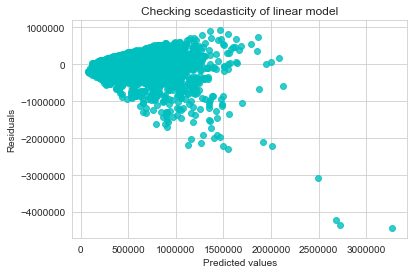

In [12]:
sns.regplot(x = regressor.predict(X_test), y = Errors, color= 'c', fit_reg= False, scatter = True)
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Checking scedasticity of linear model')
plt.show()

The plot above shows that the residuals increase in magnitude with increasing predicted values for the test set. This means that the houses with higher price have way more pull on the residuals than those with lower prices. Also, it would seem that the dependence of a house's price is not very linear on square feet. Let us try to confirm this behavior by looking at the distribution of residuals.

Text(0.5, 1.0, 'Residual distribution')

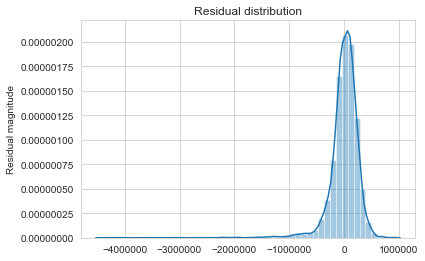

In [15]:
sns.distplot(Errors)
plt.ylabel('Residual magnitude')
plt.title('Residual distribution')

The above plot shows that the residuals are normally distributed. Even though the residuals are not uniformly distributed w.r.t. predictions, the distribution of the residuals once again hints at the linearity of the dependence of price on square feet